Import needed Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import math

Upload and combine Datasets

In [2]:
df1=  pd.read_csv('AdvWorksCusts.csv')
df2=  pd.read_csv('AW_AveMonthSpend.csv')
df = pd.concat([df1, df2['AveMonthSpend']], axis =1)
print(df.shape)

(16519, 24)


Check if the CustomerID column of both DataFrame are matching

In [3]:
sum(df1['CustomerID']-df2['CustomerID'])

0

In [4]:
df.head(3)

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Bachelors,Professional,M,M,1,0,0,2,137947,89
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Bachelors,Professional,M,S,0,1,3,3,101141,117
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Bachelors,Professional,M,M,1,1,3,3,91945,123


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16519 entries, 0 to 16518
Data columns (total 24 columns):
CustomerID              16519 non-null int64
Title                   88 non-null object
FirstName               16519 non-null object
MiddleName              9534 non-null object
LastName                16519 non-null object
Suffix                  2 non-null object
AddressLine1            16519 non-null object
AddressLine2            276 non-null object
City                    16519 non-null object
StateProvinceName       16519 non-null object
CountryRegionName       16519 non-null object
PostalCode              16519 non-null object
PhoneNumber             16519 non-null object
BirthDate               16519 non-null object
Education               16519 non-null object
Occupation              16519 non-null object
Gender                  16519 non-null object
MaritalStatus           16519 non-null object
HomeOwnerFlag           16519 non-null int64
NumberCarsOwned         16519

Check and Remove Duplicates

In [6]:
sum(df.duplicated())

98

In [7]:
df.drop_duplicates(subset = 'CustomerID', keep = 'first', inplace = True)
df.shape

(16404, 24)

Drop Unnecessary Columns

In [8]:
df_new = df.drop(['City', 'StateProvinceName', 'CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix', 
                  'AddressLine1', 'AddressLine2','PostalCode', 'PhoneNumber', 'BirthDate', 'City'], axis =1)
print(df_new.shape)

(16404, 11)


Check for missing value

In [9]:
missing_df = df_new.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count


Visualize the Dataset

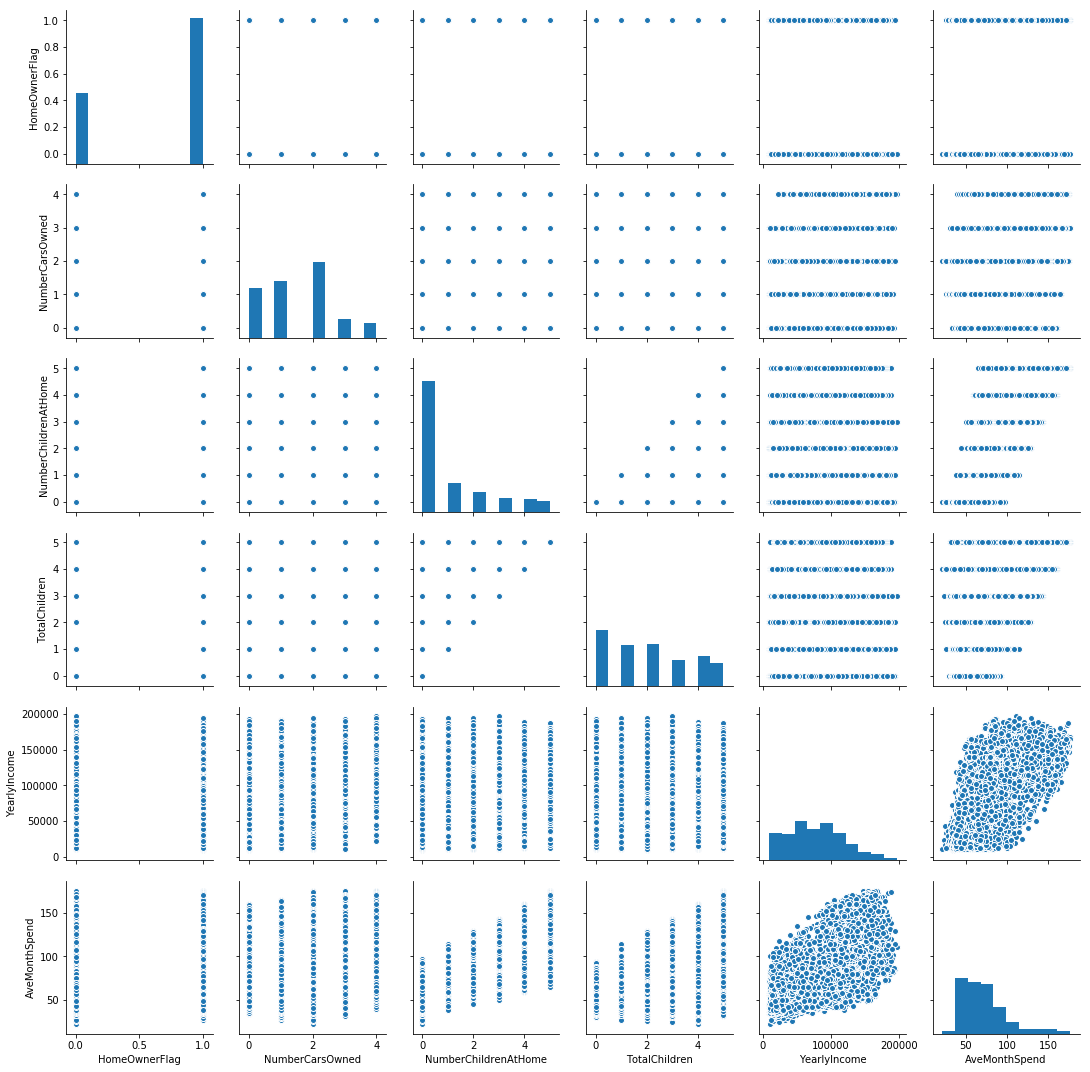

In [161]:
sns.pairplot(df_new)

Convert  Birthdate Column to Age

In [162]:
df_new['Age'] = pd.to_datetime('1998-01-01') - pd.to_datetime(df['BirthDate'])
df_new['Age'] = df_new['Age'].astype('timedelta64[D]').astype(int)
df_new['Age'] = df_new['Age']/365
df_new['Age'].head(3)

0    31.756164
1    32.657534
2    32.410959
Name: Age, dtype: float64

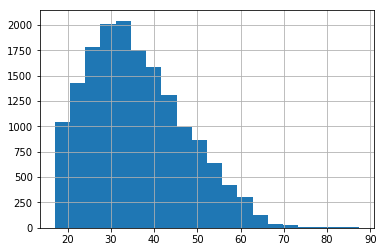

In [163]:
df_new['Age'].hist(bins=20)

Tranform Numerical Data (age & Yearly Income) to resemble normal distribution

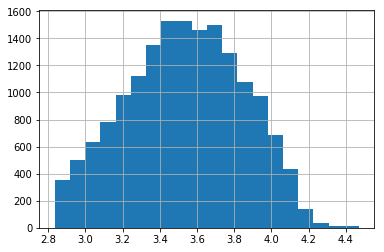

In [164]:
df_new['Age'] = df_new['Age'].apply(np.log)
df_new['YearlyIncome'] = df_new['YearlyIncome']**0.5
df_new['Age'].hist(bins = 20)

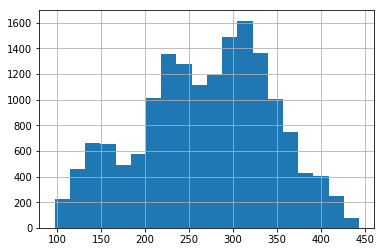

In [165]:
df_new['YearlyIncome'].hist(bins = 20)

Convert Categorical Column to Numerical

In [166]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

In [167]:
le_country = LabelEncoder()
ohe_country = OneHotEncoder()
le_country.fit(df_new['CountryRegionName'])
country_name = le_country.transform(df_new['CountryRegionName'])
ohe_country_name = ohe_country.fit(country_name.reshape(-1,1))
country_cat = ohe_country_name.transform(country_name.reshape(-1,1)).toarray()
country_cat.shape

(16404, 6)

In [168]:
le_education = LabelEncoder()
ohe_education = OneHotEncoder()
le_education.fit(df_new['Education'])
education = le_education.transform(df_new['Education'])
education_ohe = ohe_education.fit(education.reshape(-1,1))
education_cat= education_ohe.transform(education.reshape(-1,1)).toarray()
education_cat.shape

(16404, 5)

In [169]:
le_occ = LabelEncoder()
ohe_occ = OneHotEncoder()
le_occ.fit(df_new['Occupation'])
occupation = le_occ.transform(df_new['Occupation'])
occupation_ohe = ohe_occ.fit(occupation.reshape(-1,1))
occupation_cat = occupation_ohe.transform(occupation.reshape(-1,1)).toarray()
occupation_cat.shape

(16404, 5)

In [170]:
le_gen = LabelEncoder()
ohe_gen = OneHotEncoder()
le_gen.fit(df_new['Gender'])
gender = le_gen.transform(df_new['Gender'])
gender_ohe = ohe_gen.fit(gender.reshape(-1,1))
gender_cat = gender_ohe.transform(gender.reshape(-1,1)).toarray()
gender_cat.shape

(16404, 2)

In [171]:
le_mar = LabelEncoder()
ohe_mar = OneHotEncoder()
le_mar.fit(df_new['MaritalStatus'])
marital = le_mar.transform(df_new['MaritalStatus'])
marital_ohe = ohe_mar.fit(marital.reshape(-1,1))
marital_cat = marital_ohe.transform(marital.reshape(-1,1)).toarray()
marital_cat.shape

(16404, 2)

In [172]:
le_home = LabelEncoder()
ohe_home = OneHotEncoder()
le_home.fit(df_new['HomeOwnerFlag'])
home = le_home.transform(df_new['HomeOwnerFlag'])
home_ohe = ohe_home.fit(home.reshape(-1,1))
home_cat = home_ohe.transform(home.reshape(-1,1)).toarray()
home_cat.shape

(16404, 2)

In [173]:
le_car = LabelEncoder()
ohe_car = OneHotEncoder()
le_car.fit(df_new['NumberCarsOwned'])
cars = le_car.transform(df_new['NumberCarsOwned'])
cars_ohe = ohe_car.fit(cars.reshape(-1,1))
cars_cat = cars_ohe.transform(cars.reshape(-1,1)).toarray()
cars_cat.shape

(16404, 5)

In [174]:
le_childhome = LabelEncoder()
ohe_childhome = OneHotEncoder()
le_childhome.fit(df_new['NumberChildrenAtHome'])
childathome = le_childhome.transform(df_new['NumberChildrenAtHome'])
childathome_ohe = ohe_childhome.fit(childathome.reshape(-1,1))
childathome_cat = childathome_ohe.transform(childathome.reshape(-1,1)).toarray()
childathome_cat.shape

(16404, 6)

In [175]:
le_totalchild = LabelEncoder()
ohe_totalchild = OneHotEncoder()
le_totalchild.fit(df_new['TotalChildren'])
totalchild = le_totalchild.transform(df_new['TotalChildren'])
totalchild_ohe = ohe_totalchild.fit(totalchild.reshape(-1,1))
totalchild_cat = totalchild_ohe.transform(totalchild.reshape(-1,1)).toarray()
totalchild_cat.shape

(16404, 6)

Concatenate all the matrices of one-hot encodung created from categorical features

In [176]:
Cat_Features = np.concatenate((country_cat, education_cat, occupation_cat, gender_cat, marital_cat, home_cat, cars_cat, childathome_cat, totalchild_cat  ), axis =1)
Cat_Features.shape

(16404, 39)

Create Features and Label Columns

In [177]:
x = np.concatenate((Cat_Features, np.array(df_new['Age']).reshape(16404,1), np.array(df_new['YearlyIncome']).reshape(16404,1)), axis =1)
y = df_new['AveMonthSpend']
X = pd.DataFrame(x)

In [178]:
y.head(3)

0     89
1    117
2    123
Name: AveMonthSpend, dtype: int64

Split the Dataset into a Training & Test set

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11482, 41)
(4922, 41)
(11482,)
(4922,)


Normalize the numeric colums (Age & Yearly Income)

In [180]:
sc= StandardScaler()
sc.fit(X_train[[39, 40]])
X_train[[39, 40]] = sc.transform(X_train[[39, 40]])
X_test[[39, 40]] = sc.transform(X_test[[39, 40]])

C:\Users\fajanilanNB\AppData\Local\Continuum\Anaconda3.5\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\fajanilanNB\AppData\Local\Continuum\Anaconda3.5\lib\site-packages\pandas\core\frame.py:3144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\fajanilanNB\AppData\Local\Continuum\Anaconda3.5\lib\site-packages\pandas\core\frame.py:3116: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [181]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
6358,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.870752,0.229161
1335,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.026358,-1.462580
15135,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.012615,1.251775
7783,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.699023,0.872192
1265,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.661306,0.097856


In [182]:
from sklearn.ensemble import RandomForestRegressor

In [183]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [184]:
pred_train = rfr.predict(X_train)
pred_test = rfr.predict(X_test)

In [185]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [186]:
r2 = r2_score(y_test, pred_test)
r2_adj = r2 - (40 - 1)/(y_test.shape[0] - 40) * (1 - r2)

In [187]:
print('R^2           = ' + str(r2_score(y_test, pred_test)))
print('Adjusted R^2  = ' + str(r2_adj))
print('RMSE          = ' + str(np.sqrt(mean_squared_error(y_test, pred_test))))
print('MSE           = ' + str(mean_squared_error(y_test, pred_test)))
print('MAE           = ' + str(mean_absolute_error(y_test, pred_test)))

R^2           = 0.9834852381024419
Adjusted R^2  = 0.9833533094432849
RMSE          = 3.4990336507715987
MSE           = 12.243236489232022
MAE           = 2.7842950020316946


C:\Users\fajanilanNB\AppData\Local\Continuum\Anaconda3.5\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


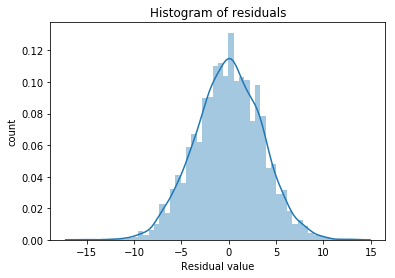

In [188]:
def hist_resids(y_test, pred_test):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test, pred_test)
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, pred_test) 

In [189]:
import scipy.stats as ss

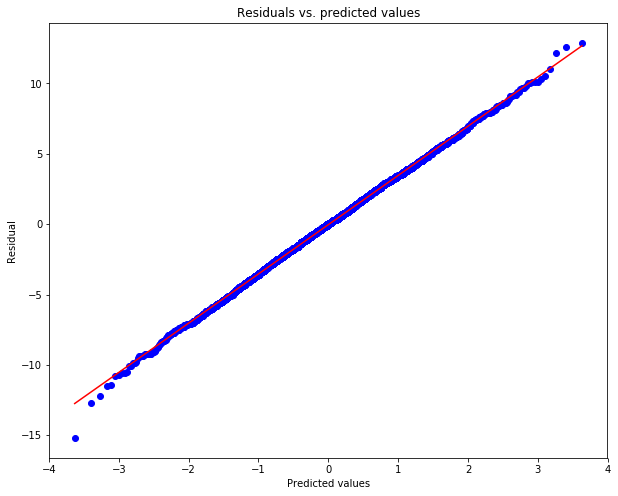

In [190]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test, y_score)
    ## now make the residual plots
    plt.figure(figsize=(10,8))
    ss.probplot(resids, plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, pred_test)   

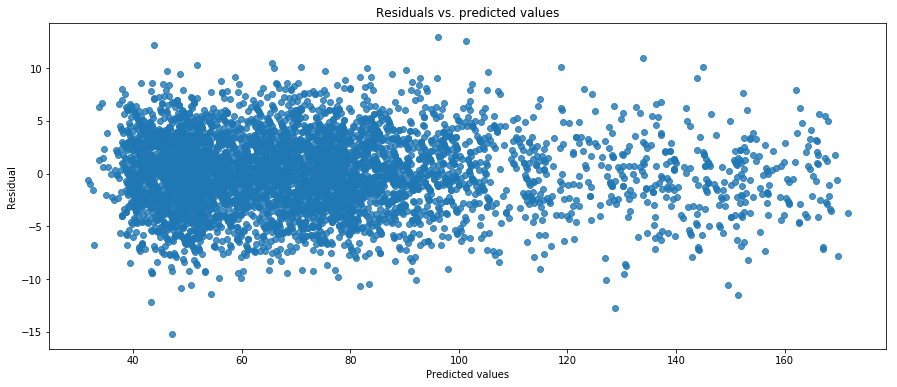

In [191]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test, y_score)
    ## now make the residual plots
    plt.figure(figsize=(15,6))
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, pred_test) 

In [192]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
inside = KFold(n_splits=10, shuffle = True)
outside = KFold(n_splits=10, shuffle = True)

In [194]:
param_grid = {"max_features": [25, 30, 31, 32, 33, 34, 35], "min_samples_leaf":[25, 30, 32, 34, 36, 38, 40]}
rf_clf = RandomForestRegressor() 

rf_clf = GridSearchCV(estimator = rf_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      #scoring = 'r2_score',
                      return_train_score = True)
rf_clf.fit(x, y)
print(rf_clf.best_estimator_.max_features)
print(rf_clf.best_estimator_.min_samples_leaf)

33
25


In [195]:
from sklearn.model_selection import cross_val_score
cv_estimate = cross_val_score(rf_clf, X, y, 
                                 cv = outside) # Use the outside folds

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.983
SDT of the metric       = 0.001
Outcomes by cv fold
Fold  1    0.983
Fold  2    0.984
Fold  3    0.985
Fold  4    0.983
Fold  5    0.983
Fold  6    0.984
Fold  7    0.983
Fold  8    0.983
Fold  9    0.981
Fold 10    0.984


In [196]:
rf_mod = RandomForestRegressor(max_features = rf_clf.best_estimator_.max_features, 
                                min_samples_leaf = rf_clf.best_estimator_.min_samples_leaf) 
rf_mod.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=33, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=25,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [197]:
pred_test = rf_mod.predict(X_test)

In [198]:
r2 = r2_score(y_test, pred_test)
r2_adj = r2 - (40 - 1)/(y_test.shape[0] - 40) * (1 - r2)

In [199]:
print('R^2           = ' + str(r2_score(y_test, pred_test)))
print('Adjusted R^2  = ' + str(r2_adj))
print('RMSE          = ' + str(np.sqrt(mean_squared_error(y_test, pred_test))))
print('MSE           = ' + str(mean_squared_error(y_test, pred_test)))
print('MAE           = ' + str(mean_absolute_error(y_test, pred_test)))

R^2           = 0.9811983613140037
Adjusted R^2  = 0.9810481638726367
RMSE          = 3.733445467013498
MSE           = 13.93861505516364
MAE           = 2.858215496611739


Check Feature Importances

Text(0,0.5,'Feature importance')

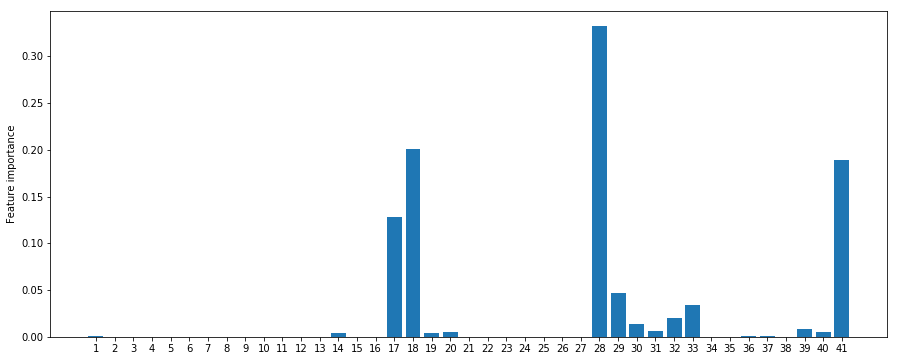

In [200]:
importance = rf_mod.feature_importances_
plt.figure(figsize = (15,6))
plt.bar(range(41), importance, tick_label = X_train.columns+1)
#plt.xticks(rotation=90)
plt.ylabel('Feature importance')

Upload Final Test Dataset

In [201]:
df_test = pd.read_csv('AW_test.csv')
df_test.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,18988,NaN,Courtney,A,Baker,NaN,8727 Buena Vista Ave.,NaN,Fremont,California,...,1/5/1945,Bachelors,Management,F,S,0,2,0,5,86931
1,29135,NaN,Adam,C,Allen,NaN,3491 Cook Street,NaN,Haney,British Columbia,...,10/4/1964,Bachelors,Skilled Manual,M,M,1,2,2,4,100125
2,12156,NaN,Bonnie,NaN,Raji,NaN,359 Pleasant Hill Rd,NaN,Burbank,California,...,1/12/1934,Graduate Degree,Management,F,M,1,2,0,4,103985
3,13749,NaN,Julio,C,Alonso,NaN,8945 Euclid Ave.,NaN,Burlingame,California,...,9/22/1958,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161
4,27780,NaN,Christy,A,Andersen,NaN,"42, boulevard Tremblay",NaN,Dunkerque,Nord,...,3/19/1965,High School,Manual,F,M,1,1,2,2,21876


Replicate the Data Transformation steps performed in Train Datasets:
1. Create Age column using Birthdate column
2. Drop unnecessary columns
3. Check missing values
4. Transform Age and Yearly Income Columns 

In [202]:
df_CostumerID = df_test['CustomerID']

In [203]:
df_test['Age'] = pd.to_datetime('1998-01-01') - pd.to_datetime(df_test['BirthDate'])
df_test['Age'] = df_test['Age'].astype('timedelta64[D]').astype(int)
df_test['Age'] = df_test['Age']/365
df_test['Age'].head(3)

0    53.024658
1    33.265753
2    64.013699
Name: Age, dtype: float64

In [204]:
df_test = df_test.drop(['City', 'StateProvinceName', 'CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix', 
                  'AddressLine1', 'AddressLine2','PostalCode', 'PhoneNumber', 'BirthDate', 'City'], axis =1)
print(df_test.shape)

(500, 11)


In [205]:
df_test.isnull().values.any()

False

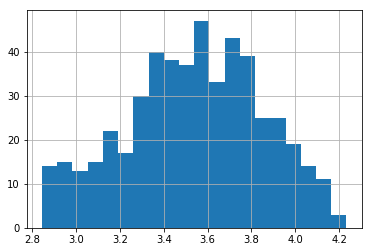

In [206]:
df_test['Age'] = df_test['Age'].apply(np.log)
df_test['YearlyIncome'] = df_test['YearlyIncome']**0.5
df_test['Age'].hist(bins = 20)

Transform the Categorical Columns into One-Hot Encoding based on the learning from 'fit' function of Train Set

In [207]:
country_name_test = le_country.transform(df_test['CountryRegionName'])
country_cat_test = ohe_country_name.transform(country_name_test.reshape(-1,1)).toarray()
country_cat_test.shape

(500, 6)

In [208]:
education_test = le_education.transform(df_test['Education'])
education_cat_test= education_ohe.transform(education_test.reshape(-1,1)).toarray()
education_cat_test.shape

(500, 5)

In [209]:
occupation_test = le_occ.transform(df_test['Occupation'])
occupation_cat_test = occupation_ohe.transform(occupation_test.reshape(-1,1)).toarray()
occupation_cat_test.shape

(500, 5)

In [210]:
gender_test = le_gen.transform(df_test['Gender'])
gender_cat_test = gender_ohe.transform(gender_test.reshape(-1,1)).toarray()
gender_cat_test.shape

(500, 2)

In [211]:
marital_test = le_mar.transform(df_test['MaritalStatus'])
marital_cat_test = marital_ohe.transform(marital_test.reshape(-1,1)).toarray()
marital_cat_test.shape

(500, 2)

In [212]:
home_test = le_home.transform(df_test['HomeOwnerFlag'])
home_cat_test = home_ohe.transform(home_test.reshape(-1,1)).toarray()
home_cat_test.shape

(500, 2)

In [213]:
cars_test = le_car.transform(df_test['NumberCarsOwned'])
cars_cat_test = cars_ohe.transform(cars_test.reshape(-1,1)).toarray()
cars_cat_test.shape

(500, 5)

In [214]:
childathome_test = le_childhome.transform(df_test['NumberChildrenAtHome'])
childathome_cat_test = childathome_ohe.transform(childathome_test.reshape(-1,1)).toarray()
childathome_cat_test.shape

(500, 6)

In [215]:
totalchild_test = le_totalchild.transform(df_test['TotalChildren'])
totalchild_cat_test = totalchild_ohe.transform(totalchild_test.reshape(-1,1)).toarray()
totalchild_cat_test.shape

(500, 6)

In [216]:
Cat_Features_Test = np.concatenate((country_cat_test, education_cat_test, occupation_cat_test, gender_cat_test, marital_cat_test, home_cat_test, cars_cat_test, childathome_cat_test, totalchild_cat_test), axis =1)
Cat_Features_Test.shape

(500, 39)

In [217]:
Features_test = np.concatenate((Cat_Features_Test, np.array(df_test['Age']).reshape(500,1), np.array(df_test['YearlyIncome']).reshape(500,1)), axis =1)
Features_test.shape

(500, 41)

In [218]:
Final_Features = pd.DataFrame(Features_test)
Final_Features.head(3)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.970757,294.840635
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.504528,316.425347
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.159097,322.467053


In [219]:
Final_Features[[39, 40]] = sc.transform(Final_Features[[39, 40]])

Predict the class based on the selected learning model. In this case, random forest.

In [224]:
class_prediction = rfr.predict(Final_Features)

Output the prediction to csv file

In [225]:
ids = df_CostumerID
output = pd.DataFrame({ 'CustomerId' : ids, 'Purchased': class_prediction})
output.to_csv('Ave_Spend_predictions2.csv', index = False)
output.head()

,CustomerId,Purchased
0,18988,46.7
1,29135,114.2
2,12156,46.6
3,13749,86.5
4,27780,57.1


In [222]:
output.shape

(500, 2)

In [223]:
df2.head()

,CustomerID,AveMonthSpend
0,11000,89
1,11001,117
2,11002,123
3,11003,50
4,11004,95
